In [106]:
#See also the video on the code itself:
#Link: 

#This is the code used to make the analysis for the Not David video on percolation theory
#Link:

#much of this code is based off of:
#https://www.uio.no/studier/emner/matnat/fys/FYS4460/v20/notes/book.pdf

#call necessary modules
#if you do not have these modules you should be able to 
#pip install module_name_here 
#for all of them

from pylab import *
from scipy.ndimage import measurements
from skimage import measure, morphology
from PIL import Image
from matplotlib import pyplot as plt


def get_neighbourhood_and_pc(str):
    #neighbourKernal specifies how neighbours in 3x3 block are defined
    #Input: String
    #'NN' = nearest neighbours 
    # 0 1 0 
    # 1 X 1 (X is the reference, 1s are neighbours and 0s are not)
    # 0 1 0
    #
    #'NNN' = next-nearest neighbours
    # 1 1 1
    # 1 X 1
    # 1 1 1
    #
    #'tri' = triangular
    # 1 1 0
    # 1 X 1
    # 0 1 1
    
    #Output: neighbourKernal
    #        pc = the associated critical density
    
    if str == 'NN':
        pc = 0.592
        neighbourKernal = array([[0, 1, 0],[1, 1, 1], [0, 1, 0]])
    elif str == 'NNN':
        pc = 0.407
        neighbourKernal = array([[1, 1, 1],[1, 1, 1], [1, 1, 1]])
    elif str == 'tri':
        pc = 0.5
        neighbourKernal = array([[1, 1, 0],[1, 1, 1], [0, 1, 1]])
        
    return neighbourKernal, pc

In [108]:
#Choose the neighbourhood type
neigh = 'NN'
neighbourKernal, pc = get_neighbourhood_and_pc(neigh)

#I will use NN here. If you change this, the critical density will change

In [128]:
#plot the percolation probability as function of p



#create list of densities values between 0 and 1
#it is pretty rare for critical densities to be <0.2 or >0.8 so we won't do too much sampling there
density_list = [0, 0.1, 0.2, 0.8, 0.9, 1] 
#most of the samples will be between 0.4 and 0.6
num_densities = 20
density_list = append(density_list, linspace(0.3,0.7,num_densities))
density_list.sort()

# set the grid size along one dimension
# total grid will be size grid_size*grid_size
grid_size = 200

# set number of random trials
nsamp = 500


Pi = np.zeros((len(density_list), 1)) #probabilities will go here
for dd in range(len(density_list)):
    density = density_list[dd]
    
    for trial in range(nsamp):
        
        #make a random grid
        z = rand(grid_size,grid_size)
        #values less than the density are set to 0, otherwise 1
        m = z<density

        #test to see if there is a percolating cluster
        lw, num = measurements.label(m, neighbourKernal)
        perc_x = intersect1d(lw[0,:],lw[-1,:])
        perc = perc_x[where(perc_x>0)]
        if len(perc) > 0:
            #if there is a percolating cluster update the probability
            Pi[dd] += 1


percProb = Pi/nsamp       


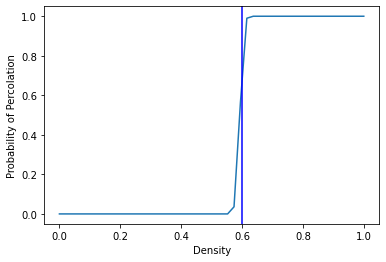

In [129]:
#If neigh ='NN' you should see a sharp increase around 0.6
#this means 0.6 is roughly the critical density
plot(density_list, percProb[:])
plt.axvline(x = 0.6, color = 'b', label = 'axvline - full height')
ylabel('Probability of Percolation')
xlabel('Density');

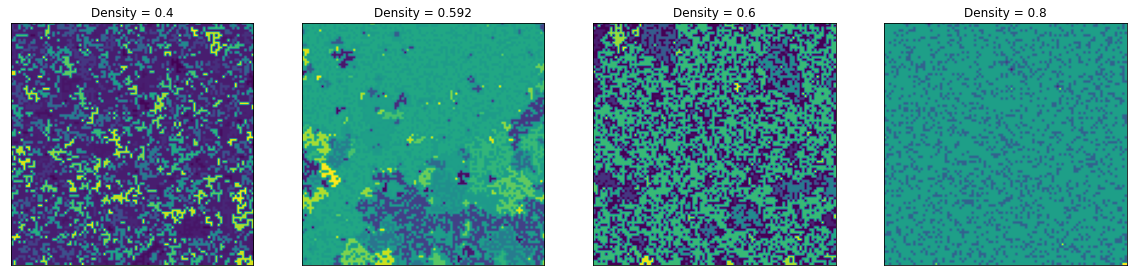

In [118]:
#Now that we know the critical density is around 0.6
#lets look at how the grid looks like below, at, and above the critical density

grid_size = 100

#0.592 is the true critical point for NN and 0.6 is the estimate from the previous graph
density_list = [0.4, 0.592,0.6, 0.8]

count = 0
fig, axs = plt.subplots(1,4)

default_coloring = False

for density in density_list:
    #make a random grid of 0s and 1s
    z = rand(grid_size,grid_size)
    m = z<density

    lw = measurements.label(m, neighbourKernal)
    lw = lw[0]
    
    if default_coloring:
        axs[count].imshow(lw)
    else:
        area = measurements.sum(m, lw, index=arange(lw.max() + 1))
        colors = np.random.permutation(len(area)) #randomize the colors for better visibility
        areaImg = colors[lw]
        axs[count].imshow(areaImg)

            
    axs[count].set_title('Density = ' + str(density))
    axs[count].set_xticks([])
    axs[count].set_yticks([])

    count += 1

    fig.set_size_inches(20, 20)
    #fig.savefig('test2png.png', dpi=100)
    

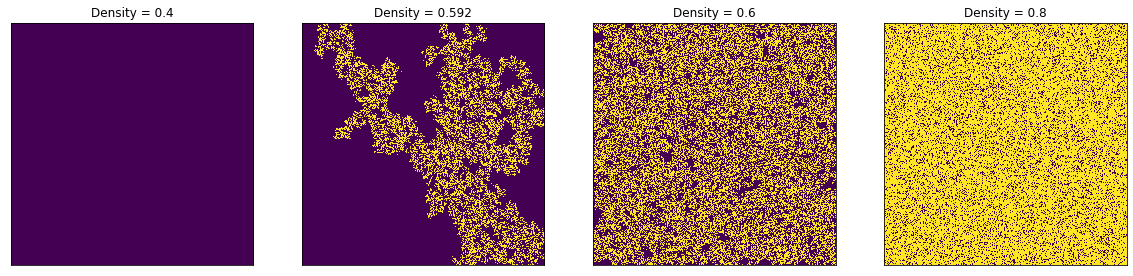

In [103]:
#Because of the fractal nature of the clusters it is
#equivalent to study properties of the largest cluster only
#here we do the same as above but isolate the largest cluster

grid_size = 5000

#0.592 is the true critical point and 0.6 is the estimate from the previous graph
density_list = [0.4, 0.592,0.6, 0.8]

count = 0
fig, axs = plt.subplots(1,4)



for density in density_list:
    #make a random grid of 0s and 1s
    z = rand(grid_size,grid_size)
    m = z<density

    lw = measurements.label(m, neighbourKernal)
    lw = lw[0]
  
    rp = measure.regionprops(lw)
    # get size of largest cluster
    size = max([i.area for i in rp])

    out = morphology.remove_small_objects(lw, min_size=size-1)
    out[where(out > 0)] = 1

    axs[count].imshow(out, interpolation='None')


            
    axs[count].set_title('Density = ' + str(density))
    axs[count].set_xticks([])
    axs[count].set_yticks([])

    count += 1

    fig.set_size_inches(20, 20)